# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [261]:
import pandas as pd
import math

In [262]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# Creación del vocabulario
vocabulario = set()
for doc in documents:
    palabras = doc.lower().strip(".").replace(",", "").split()
    for palabra in palabras:
        vocabulario.add(palabra)
print(vocabulario)
print(len(vocabulario))

# Creación del diccionario y representación TF corregida (sin substrings)
diccionario_tf = {}
for i, doc in enumerate(documents):
    diccionario_tfd = {}
    palabras = doc.lower().strip(".").replace(",", "").split()
    for termino in vocabulario:
        count = sum(1 for palabra in palabras if palabra == termino)
        diccionario_tfd[termino] = count
    diccionario_tf[i] = diccionario_tfd
print(diccionario_tf)

{'de', 'importante', 'en', 'del', 'debajo', 'perro', 'jugaron', 'cómoda', 'la', 'es', 'limpieza', 'escondió', 'gato', 'cama', 'jardín', 'el', 'limpia', 'estaba', 'y', 'se'}
20
{0: {'de': 1, 'importante': 0, 'en': 0, 'del': 0, 'debajo': 1, 'perro': 0, 'jugaron': 0, 'cómoda': 0, 'la': 1, 'es': 0, 'limpieza': 0, 'escondió': 1, 'gato': 1, 'cama': 1, 'jardín': 0, 'el': 1, 'limpia': 0, 'estaba': 0, 'y': 0, 'se': 1}, 1: {'de': 0, 'importante': 0, 'en': 0, 'del': 0, 'debajo': 0, 'perro': 0, 'jugaron': 0, 'cómoda': 1, 'la': 1, 'es': 0, 'limpieza': 0, 'escondió': 0, 'gato': 0, 'cama': 1, 'jardín': 0, 'el': 0, 'limpia': 1, 'estaba': 1, 'y': 1, 'se': 0}, 2: {'de': 0, 'importante': 0, 'en': 1, 'del': 0, 'debajo': 0, 'perro': 1, 'jugaron': 1, 'cómoda': 0, 'la': 0, 'es': 0, 'limpieza': 0, 'escondió': 0, 'gato': 1, 'cama': 0, 'jardín': 1, 'el': 3, 'limpia': 0, 'estaba': 0, 'y': 1, 'se': 0}, 3: {'de': 0, 'importante': 1, 'en': 0, 'del': 1, 'debajo': 0, 'perro': 0, 'jugaron': 0, 'cómoda': 0, 'la': 1, 'e

In [263]:
matriz = pd.DataFrame(diccionario_tf)
matriz.T

,de,importante,en,del,debajo,perro,jugaron,cómoda,la,es,limpieza,escondió,gato,cama,jardín,el,limpia,estaba,y,se
0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1
1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0
2,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,3,0,0,1,0
3,0,1,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0


In [264]:
matriz.to_csv("MatrizTF.csv", index=True)

In [265]:
# Cálculo de IDF
N = len(documents)
idf = {}
for termino in vocabulario:
    df = sum(1 for doc in documents if termino in doc.lower())
    idf[termino] = math.log10(N / df) if df > 0 else 0

# Cálculo de matriz TF-IDF 
matriz_tfidf = matriz.copy().astype(float)

for termino in matriz_tfidf.index:
    for doc_id in matriz_tfidf.columns:
        tf = matriz.loc[termino, doc_id]
        matriz_tfidf.loc[termino, doc_id] = tf * idf[termino]

# Mostrar la matriz TF-IDF final
print("Matriz TF-IDF:")
print(matriz_tfidf)

Matriz TF-IDF:
                   0         1         2         3
de          0.301030  0.000000  0.000000  0.000000
importante  0.000000  0.000000  0.000000  0.602060
en          0.000000  0.000000  0.602060  0.000000
del         0.000000  0.000000  0.000000  0.602060
debajo      0.602060  0.000000  0.000000  0.000000
perro       0.000000  0.000000  0.602060  0.000000
jugaron     0.000000  0.000000  0.602060  0.000000
cómoda      0.000000  0.602060  0.000000  0.000000
la          0.124939  0.124939  0.000000  0.124939
es          0.000000  0.000000  0.000000  0.124939
limpieza    0.000000  0.000000  0.000000  0.602060
escondió    0.602060  0.000000  0.000000  0.000000
gato        0.301030  0.000000  0.301030  0.000000
cama        0.301030  0.301030  0.000000  0.000000
jardín      0.000000  0.000000  0.301030  0.301030
el          0.124939  0.000000  0.374816  0.000000
limpia      0.000000  0.602060  0.000000  0.000000
estaba      0.000000  0.602060  0.000000  0.000000
y           0.00

In [266]:
from sklearn.decomposition import PCA

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-0.1776916 , -1.59214882],
       [-1.30825867, -0.50070176],
       [ 2.76470134,  0.42989897],
       [-1.27875107,  1.66295161]])

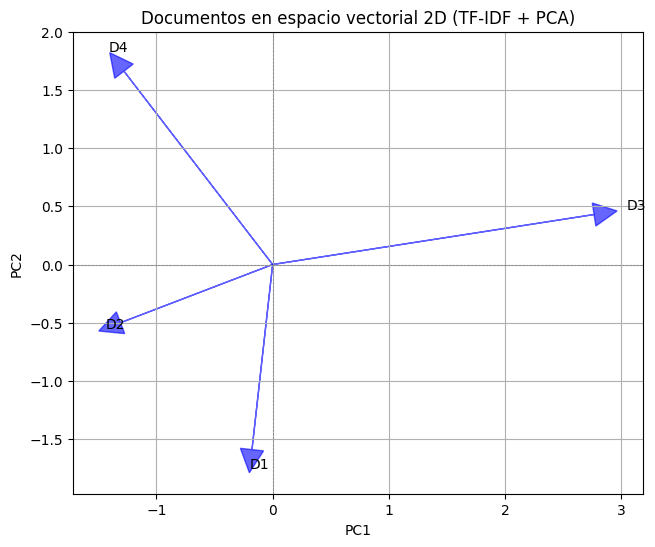

In [267]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))

for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0,0,x,y,head_width = 0.2, head_length=0.2, fc='blue', ec='blue', alpha= 0.6)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [268]:
pca = PCA(n_components=3)
docs_3d = pca.fit_transform(matriz.T)
docs_3d

array([[-0.1776916 , -1.59214882, -1.17089189],
       [-1.30825867, -0.50070176,  1.57329495],
       [ 2.76470134,  0.42989897,  0.33032311],
       [-1.27875107,  1.66295161, -0.73272616]])

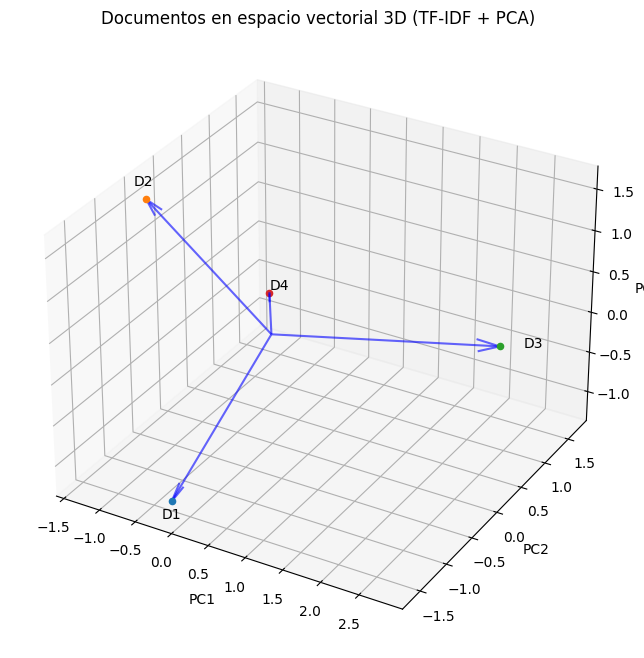

In [269]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar vectores y puntos
for i, (x, y, z) in enumerate(docs_3d):
    ax.quiver(0, 0, 0, x, y, z, color='blue', alpha=0.6, arrow_length_ratio=0.1)
    ax.scatter(x, y, z, label=f'Documento {i+1}')
    ax.text(x * 1.1, y * 1.1, z * 1.1, f'D{i+1}', fontsize=10)

ax.set_title('Documentos en espacio vectorial 3D (TF-IDF + PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.grid(True)
plt.show()


## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [270]:
# Cálculo de magnitudes para los documentos
magnitudes = {}
for doc_id, tf_vector in diccionario_tf.items():
    
    suma_cuadrados = sum(valor**2 for valor in tf_vector.values())
    magnitud = suma_cuadrados**0.5
    magnitudes[doc_id] = magnitud
print("Magnitudes de cada documento:")
for doc_id, mag in magnitudes.items():
    print(f"Documento {doc_id}: {mag:.4f}")

Magnitudes de cada documento:
Documento 0: 2.8284
Documento 1: 2.4495
Documento 2: 3.8730
Documento 3: 2.4495


In [271]:
# Consulta como una sola palabra
consulta = input("Ingresa un término de consulta: ").lower().strip()

# Verificación del término en el vocabulario
if consulta not in vocabulario:
    print(f"El término '{consulta}' no está en el vocabulario.")
else:
    # Representación de la consulta como vector
    vector_consulta = {termino: (1 if termino == consulta else 0) for termino in vocabulario}
    # Cálculo de la magnitud
    magnitud_consulta = 1.0

    # Cálculo de la similitud coseno con cada documento
    def producto_punto(v1, v2):
        return sum(v1[t] * v2[t] for t in vocabulario)

    print("\nSimilitud coseno entre la consulta y cada documento:")
    for i in range(len(documents)):
        numerador = producto_punto(vector_consulta, diccionario_tf[i])
        denominador = magnitud_consulta * magnitudes[i]
        similitud = numerador / denominador if denominador != 0 else 0
        print(f"Similitud con Documento {i}: {similitud:.4f}")


Ingresa un término de consulta:  gato



Similitud coseno entre la consulta y cada documento:
Similitud con Documento 0: 0.3536
Similitud con Documento 1: 0.0000
Similitud con Documento 2: 0.2582
Similitud con Documento 3: 0.0000


In [272]:
# Visualiza la consulta como un vector en el mismo espacio vectorial que los  que es documents
consulta_2d = pca.transform([list(vector_consulta.values())])
consulta_2d

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.46393957,  0.01071363, -0.10429616]])

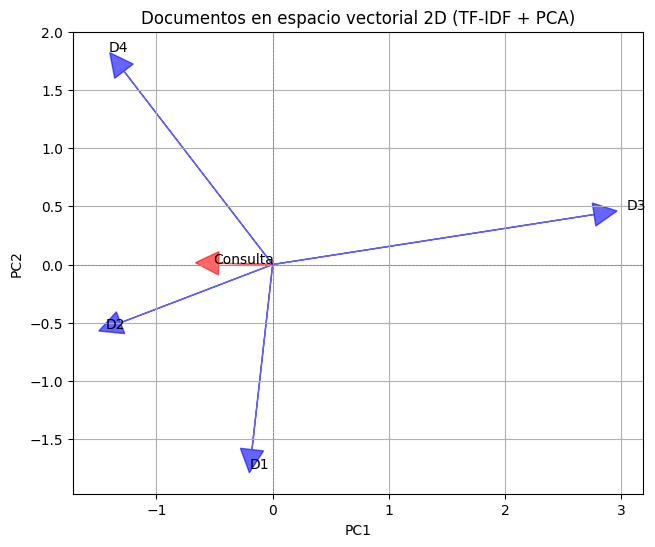

In [273]:
plt.figure(figsize = (10,6))

for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0,0,x,y,head_width = 0.2, head_length=0.2, fc='blue', ec='blue', alpha= 0.6)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

plt.arrow(0,0,consulta_2d[0][0],consulta_2d[0][1],head_width = 0.2, head_length=0.2, fc='red', ec='red', alpha= 0.6)
plt.text(consulta_2d[0][0] * 1.1, consulta_2d[0][1] * 1.1, f'Consulta', fontsize=10)

plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [274]:
consulta_3d = pca.transform([list(vector_consulta.values())])
consulta_3d

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.46393957,  0.01071363, -0.10429616]])

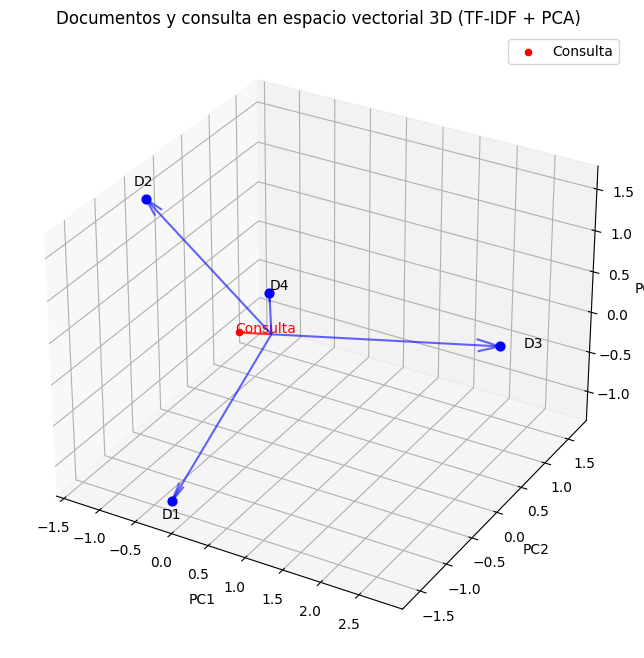

In [275]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vectores de documentos (sin poner label para evitar que salgan en la leyenda)
for i, (x, y, z) in enumerate(docs_3d):
    ax.quiver(0, 0, 0, x, y, z, color='blue', alpha=0.6, arrow_length_ratio=0.1)
    ax.scatter(x, y, z, color='blue', s=40)
    ax.text(x * 1.1, y * 1.1, z * 1.1, f'D{i+1}', fontsize=10)

# Vector de la consulta
ax.quiver(0, 0, 0,
          consulta_3d[0][0],
          consulta_3d[0][1],
          consulta_3d[0][2],
          color='red', alpha=0.8, arrow_length_ratio=0.1)

# Punto y etiqueta de la consulta
ax.scatter(consulta_3d[0][0], consulta_3d[0][1], consulta_3d[0][2], color='red', label='Consulta')
ax.text(consulta_3d[0][0] * 1.1, consulta_3d[0][1] * 1.1, consulta_3d[0][2] * 1.1, 'Consulta', fontsize=10, color='red')

# Configuración del gráfico
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Documentos y consulta en espacio vectorial 3D (TF-IDF + PCA)')
ax.legend()
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [276]:
def rankear_documentos_por_similitud(consulta, diccionario_tf, idf, magnitudes, vocabulario):
    consulta = consulta.lower().strip()
    if consulta not in vocabulario:
        print(f"El término '{consulta}' no está en el vocabulario.")
        return []
    
    vector_tf_consulta = {termino: (1 if termino == consulta else 0) for termino in vocabulario}
    magnitud_consulta = 1.0

    def producto_punto(v1, v2):
        return sum(v1[t] * v2[t] for t in vocabulario)
    
    similitudes = []
    for i in range(len(diccionario_tf)):
        numerador = producto_punto(vector_tf_consulta, diccionario_tf[i])
        denominador = magnitud_consulta * magnitudes[i]
        similitud = numerador / denominador if denominador != 0 else 0
        similitudes.append((i, similitud))
    
    similitudes.sort(key=lambda x: x[1], reverse=True) 
    return similitudes

In [277]:
# Ejecutar ranking
ranking = rankear_documentos_por_similitud(consulta, diccionario_tf, idf, magnitudes, vocabulario)

# Mostrar ranking
print("\nRanking de documentos más relevantes:")
for idx, sim in ranking:
    print(f"Documento {idx} (Similitud: {sim:.4f})")


Ranking de documentos más relevantes:
Documento 0 (Similitud: 0.3536)
Documento 2 (Similitud: 0.2582)
Documento 1 (Similitud: 0.0000)
Documento 3 (Similitud: 0.0000)


In [278]:
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)

vector_tfidf_consulta = {
    termino: (1 if termino == consulta else 0) * idf[termino]
    for termino in matriz_tfidf.index
}
consulta_vector_df = pd.DataFrame([vector_tfidf_consulta])[matriz_tfidf.index]
consulta_2d = pca.transform(consulta_vector_df)[0]
consulta_2d

array([-0.6279987 ,  0.15234498])

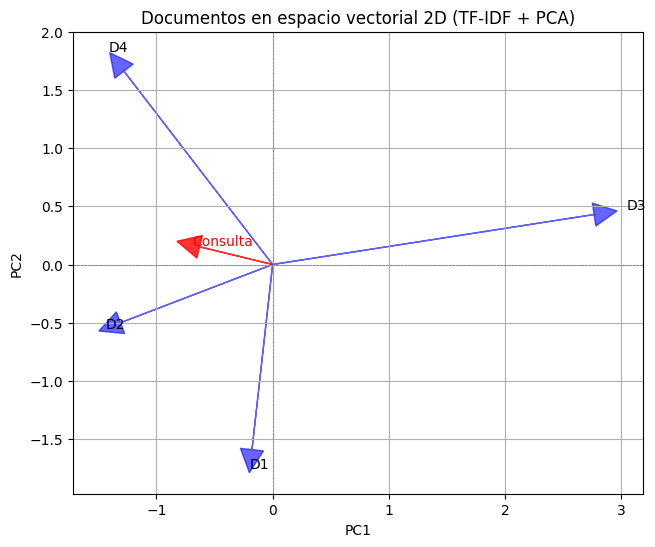

In [279]:
plt.figure(figsize=(10, 6))

# Vectores de los documentos (azul)
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.2, head_length=0.2, fc='blue', ec='blue', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

# Vector de la consulta (rojo)
plt.arrow(0, 0, consulta_2d[0], consulta_2d[1], head_width=0.2, head_length=0.2, fc='red', ec='red', alpha=0.8)
plt.text(consulta_2d[0] * 1.1, consulta_2d[1] * 1.1, 'Consulta', fontsize=10, color='red')

# Estética del gráfico
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
